In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q4.1 Visualize the two gray scale images corresponding to the first line in three.txt and the first line in eight.txt.

In [2]:
def img_plot(filename = None ,img_vec = None, plot_name = None):
    if filename != None:
        f = open(filename,'r')
        content = f.readline()
        content = content.split('\n')[0]
        content = content.strip()
        img_vec = list(content.split(' '))
        img_vec = [int(img_vec[i]) for i in range(len(img_vec))]
        plot_name = filename.replace('.txt','')
    img = []
    for i in range(16):
        tmp = []
        for j in range(16):
            tmp.append(img_vec[16*i+j])
        img.append(tmp)
    plt.imshow(img, cmap='gist_gray')
    plt.colorbar()
    plt.savefig(plot_name.replace('.txt',''))
    plt.clf()

In [3]:
three = img_plot('three.txt')
eight = img_plot('eight.txt')

<Figure size 432x288 with 0 Axes>

## Q4.2

In [4]:
def integrate(file1,file2):
    f1 = open(file1,'r')
    f2 = open(file2,'r')
    X = []
    line = f1.readline()
    while(line):
        line = line.replace('\n',' ')
        line = line.strip()
        X_tmp = list(line.split(' '))
        X_tmp = [int(X_tmp[i]) for i in range(len(X_tmp))]
        X.append(X_tmp)
        line = f1.readline()
    f1.close()
    line = f2.readline()
    while(line):
        line = line.replace('\n',' ')
        line = line.strip()
        X_tmp = list(line.split(' '))
        X_tmp = [int(X_tmp[i]) for i in range(len(X_tmp))]
        X.append(X_tmp)
        line = f2.readline()
    f2.close()
    return X

In [5]:
X = integrate('three.txt','eight.txt')

In [6]:
# get mean of X
y = [0]*256
for i in range(len(X)):
    for j in range(len(y)):
        y[j] += X[i][j]
y = [v/400 for v in y]

In [7]:
img_plot(img_vec = y, plot_name = 'q42')

<Figure size 432x288 with 0 Axes>

## Q4.3 

In [24]:
# center X
X_center = []
for x in X:
    tmp = [(x[i] - y[i]) for i in range(len(x))]
    X_center.append(tmp)

In [25]:
X_center  = np.array(X_center)
# S = np.dot(X_center.T,X_center)/(len(X_center)-1)
S = np.true_divide(np.dot(X_center.T,X_center), len(X_center)-1)

In [26]:
S_sub = S[:5,:5]
for s in S_sub:
    for ss in s:
        print(round(ss,2)," & ",end = '')
    print("\\\\")

59.17  & 142.15  & 28.68  & -7.18  & -14.34  & \\
142.15  & 878.94  & 374.14  & 24.13  & -87.13  & \\
28.68  & 374.14  & 1082.91  & 555.23  & 33.72  & \\
-7.18  & 24.13  & 555.23  & 1181.24  & 777.77  & \\
-14.34  & -87.13  & 33.72  & 777.77  & 1429.96  & \\


## Q4.4 eigen values and eigen vectors

In [27]:
w, v = np.linalg.eig(S)

In [28]:
print(round(float(w[0]),4))
print(round(float(w[1]),4))

237155.2463
145188.3527


In [29]:
v1 = [ float(v) for v in v[0]]
v2 = [ float(v) for v in v[1]]

In [30]:
# shift and scale two eigenvectors for visualizatio 
v1_visual = np.interp(v1, (min(v1),max(v1)), (0, 255))
v2_visual = np.interp(v2, (min(v2),max(v2)), (0, 255))

In [31]:
img_plot(img_vec = v1_visual,plot_name = 'eigenv1')
img_plot(img_vec = v2_visual,plot_name = 'eigenv2')

<Figure size 432x288 with 0 Axes>

## Q4.5 project X onto V

In [32]:
V = np.array([v1,v2]).T
X_proj = np.matmul(X_center,V)

In [39]:
X_center.shape
# V.shape

(400, 256)

In [33]:
print('(',round(float(X_proj[0][0]),2),",", round(float(X_proj[0][1]),2),')')
print('(',round(float(X_proj[200][0]),2),",",round(float(X_proj[200][1]),2),')')      

( -109.36 , 77.52 )
( 94.08 , 126.88 )


In [18]:
print(X_center[0][:10])
print(V[:10])
np.dot(X_center[0],V)

[ -1.125   -7.4075 -10.7375 -12.405  -13.      -8.74    -4.425   -1.9825
  -1.21    -1.7725]
[[ 0.00311189  0.01585169]
 [ 0.00349231  0.02139421]
 [-0.0024822  -0.00901893]
 [ 0.0011872   0.00939674]
 [-0.0017949  -0.01266984]
 [ 0.00506278  0.02112795]
 [-0.00310991 -0.02014756]
 [ 0.00255636  0.01512827]
 [ 0.00035214 -0.00730567]
 [-0.00497042 -0.02450575]]


array([-109.35522726,   77.52109833])

## Q4.6 plot projected 2-d point cloud (threes in blue and eights in red)

In [19]:
threeX1 = [X_proj[i][0] for i in range(200)] 
threeX2 = [X_proj[i][1] for i in range(200)]
eightX1 = [X_proj[i][0] for i in range(200,400)] 
eightX2 = [X_proj[i][1] for i in range(200,400)]

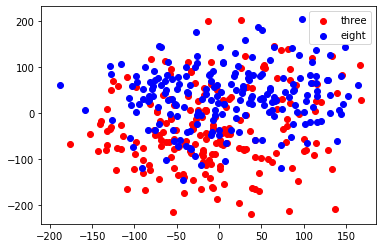

In [20]:
plt.scatter(threeX1,threeX2,c= 'red',label = 'three')
plt.scatter(eightX1,eightX2,c ='blue',label = 'eight')
plt.legend()
plt.savefig('q46')